## An analysis of non-performing loan (NPL) rates globally

A recent analysis of the Southeast Asian credit markets in an assignment at work brought to light some nuances regarding credit culture in this particular region. The data got me thinking about global credit health and non-performing loan rates globally. Given my recent foray into data analysis, I thought a notebook was in order.

Through various data techniques, I looked into answering the following questions:
    1. What are recent trends in non-performing loans globally?
    2. How do core economic variables (income level, GDP etc.) impact NPL rates?
    3. How important are other variables such as a nation's credit culture, market volatility, and real estate market?
    
### But first, what is the credit market and what are non-performing loans?

By examining the credit market, we are essentially looking at the market in which individuals, corporations, and governments seek to borrow money from investors. This form of borrowing can take on many different forms, from your daily credit card expenses to mortgages on your next beach home.

Non-performing loans (NPL) refer to loans in which the borrower has not been able to make scheduled repayments for some time (usually over 90 days). 

When NPL levels rise, it is often an indicator of deteriorating credit market health. In short, more people are not paying back what they owe.

We'll examine NPL levels across different countries from the World Bank databank.

First, we start by importing the necessary packages...

In [199]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [200]:
import missingno as msno

In [201]:
from itertools import islice
import csv

I picked the dataset on d

As there are some rows with filler column information, I skip the first 4 rows with islice.

In [202]:
all_data = []
with open('NPL.csv') as data:
    for row in islice(csv.reader(data), 4, None):
        all_data.append(np.array(row))
        
df = pd.DataFrame(all_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,
1,Aruba,ABW,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,,,,,,,...,,,,,,,,,,
2,Afghanistan,AFG,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,,,,,,,...,,49.9013229069412,4.6968178252385,4.95890140377645,4.85228704838131,7.7810908959605,12.0536179767696,11.0743789647307,,
3,Angola,AGO,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,,,,,,,...,,3.17305056414187,2.01496821504011,4.35011884491608,7.97676918024597,10.1905320738466,10.6112339715733,,,
4,Albania,ALB,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,,,,,,,...,,,,,,,,,,


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 63 columns):
0     265 non-null object
1     265 non-null object
2     265 non-null object
3     265 non-null object
4     265 non-null object
5     265 non-null object
6     265 non-null object
7     265 non-null object
8     265 non-null object
9     265 non-null object
10    265 non-null object
11    265 non-null object
12    265 non-null object
13    265 non-null object
14    265 non-null object
15    265 non-null object
16    265 non-null object
17    265 non-null object
18    265 non-null object
19    265 non-null object
20    265 non-null object
21    265 non-null object
22    265 non-null object
23    265 non-null object
24    265 non-null object
25    265 non-null object
26    265 non-null object
27    265 non-null object
28    265 non-null object
29    265 non-null object
30    265 non-null object
31    265 non-null object
32    265 non-null object
33    265 non-null object
34    265 n

A look at the dataframe seems to indicate that there are lots of missing data, especially for earlier years. To get a better picture of what data is usually missing, we use missingno to get a quick visualization.

Before using missingno however, it appears that empty data is represented by numpy strings. Thus we look to replace all such instances with np.nan for the missingno visualization to work.

In [204]:
df = df.replace('', np.nan, regex = True)

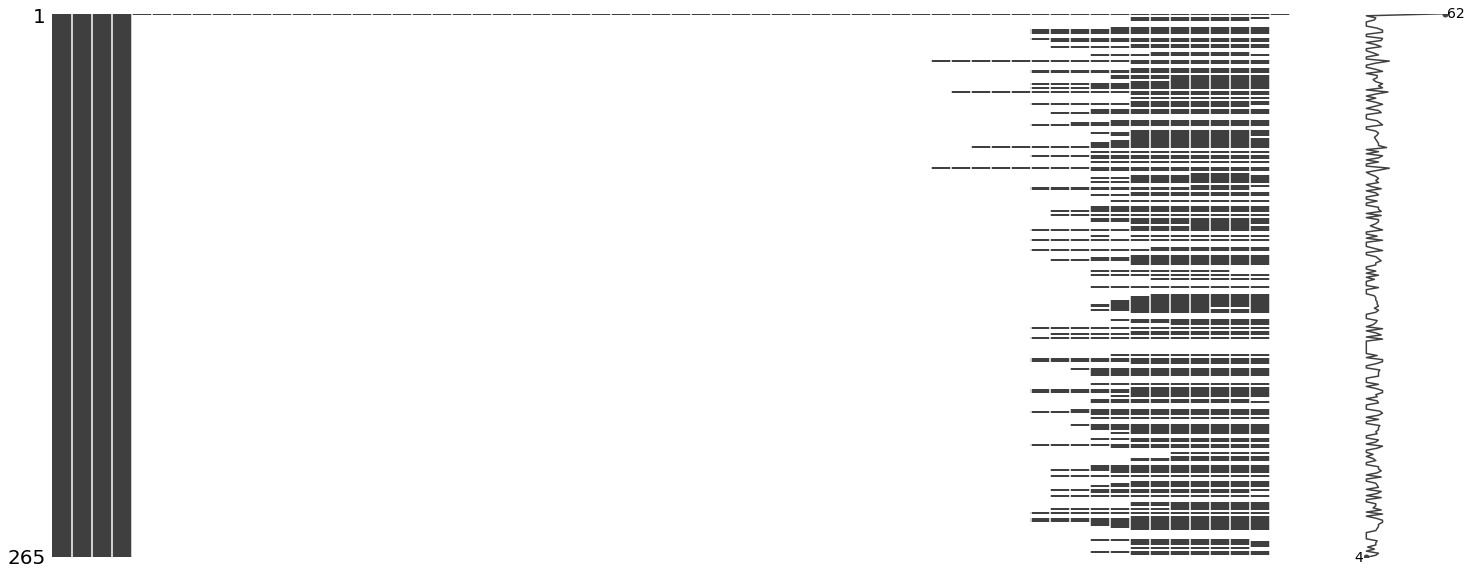

In [205]:
%matplotlib inline
msno.matrix(df)

The visualization seems to indicate large blocks of missing data, especially with the annual data up to 2010. 2016 seems to have more missing data relative to the 6 years prior. Nations that are missing data for the 2010-2015 period are thus dropped. 

Furthermore, the columns for 'Indicator name' and 'Indicator code' don't seem particularly useful.

We'll create a new dataframe with only the country, country code, and data for years 2010-2015. We will also set the column names, which currently reside in the first row.

In [206]:
recent_df = df[[0,1,54,55,56,57,58,59]]
recent_df = recent_df.dropna()
recent_df.columns = recent_df.iloc[0]
recent_df = recent_df.drop([0])
recent_df.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015
2,Afghanistan,AFG,49.9013229069412,4.6968178252385,4.95890140377645,4.85228704838131,7.7810908959605,12.0536179767696
3,Angola,AGO,3.17305056414187,2.01496821504011,4.35011884491608,7.97676918024597,10.1905320738466,10.6112339715733
7,United Arab Emirates,ARE,5.26698896173513,6.08629581295722,7.12965175228017,6.73555170490737,5.63661628252583,5.19506180189675
8,Argentina,ARG,2.11702287385862,1.39559840620402,1.7345487210843,1.73258243136737,1.990064383351,1.73684181834171
9,Armenia,ARM,3.04141129948019,3.42109151341693,3.66922217057882,4.48533892299217,6.96975042813576,7.94971668385926


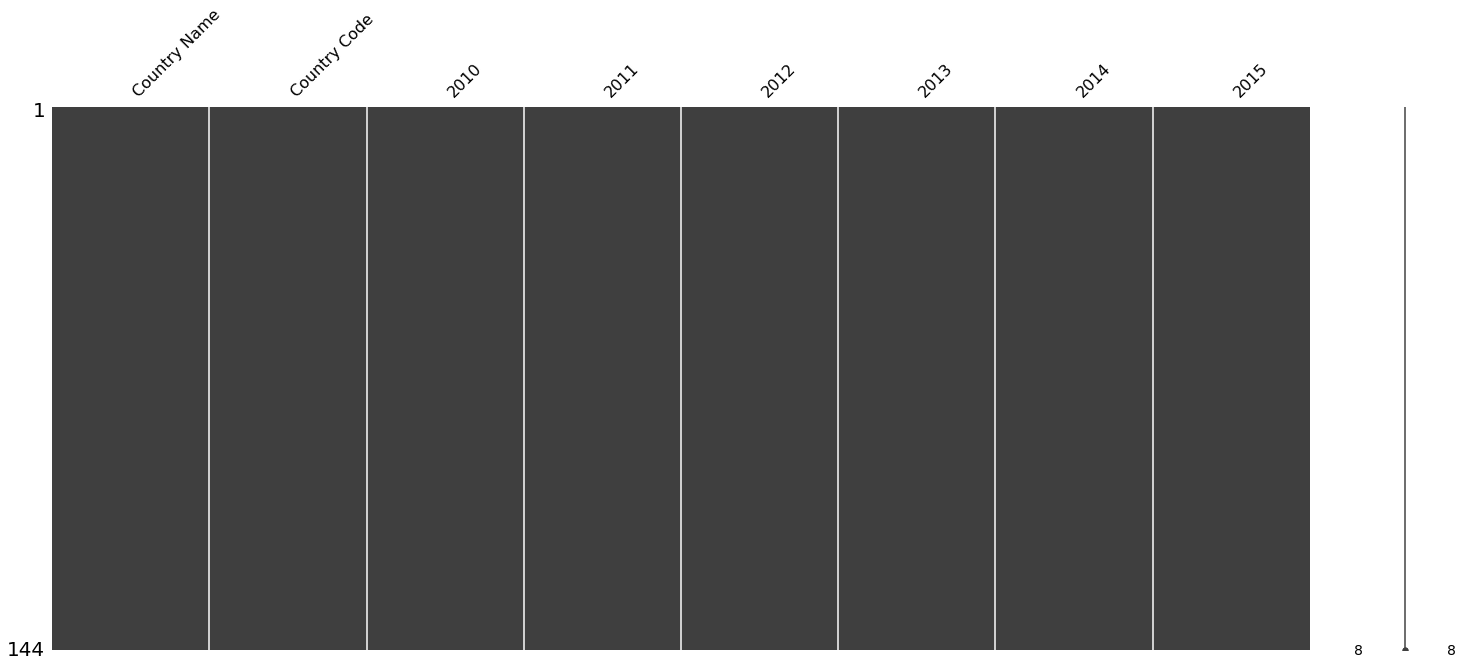

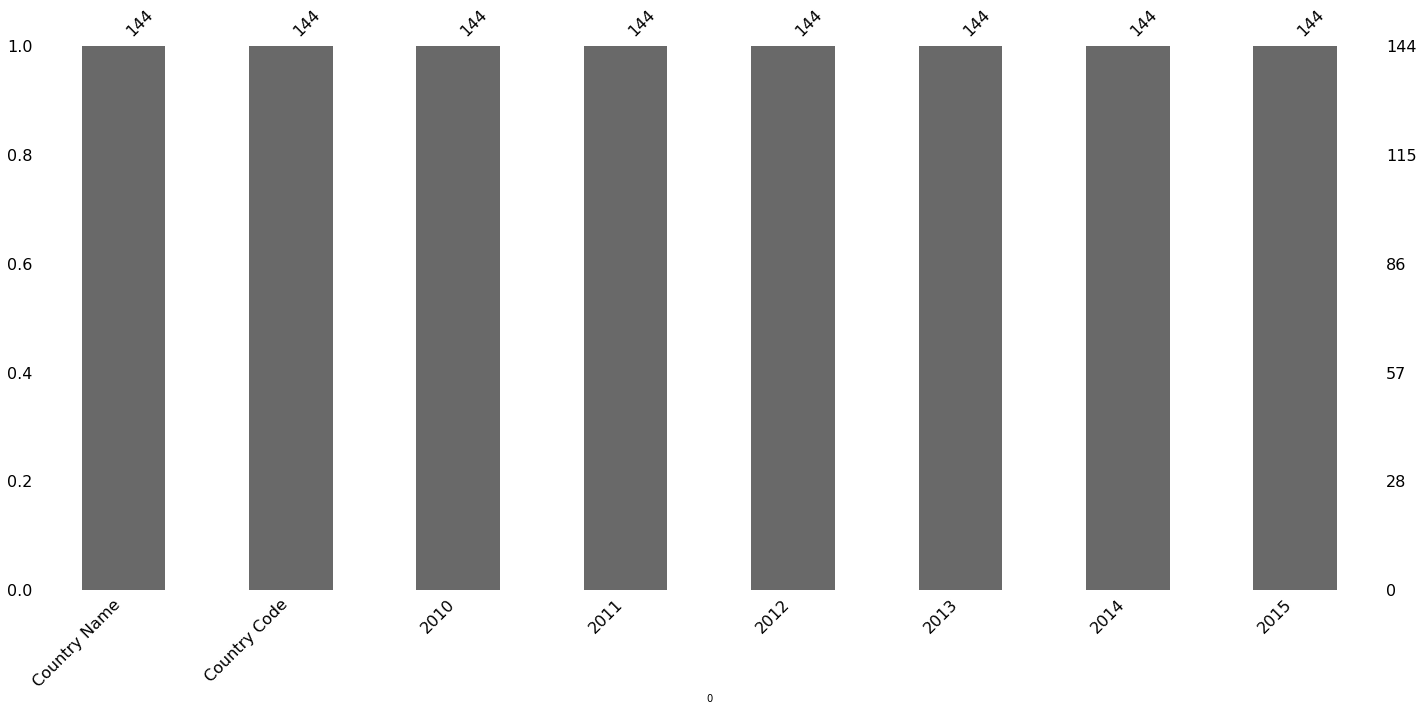

In [207]:
%matplotlib inline
msno.matrix(recent_df)
msno.bar(recent_df)

Much better. That leaves 144 countries/regions with values in every column. Some row indices might not be country specific. But first, there is the issue of data type.

In [208]:
recent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 263
Data columns (total 8 columns):
Country Name    144 non-null object
Country Code    144 non-null object
2010            144 non-null object
2011            144 non-null object
2012            144 non-null object
2013            144 non-null object
2014            144 non-null object
2015            144 non-null object
dtypes: object(8)
memory usage: 10.1+ KB


Examining the datatypes of the columns, all the data appear to be non-null objects. For the purpose of analyzing NPL levels that are meant to represent percentages, these should be of type float. 

In [209]:
years = ['2010','2011','2012','2013','2014','2015']
recent_df['Country Name'] = recent_df['Country Name'].astype(str)
recent_df['Country Code'] = recent_df['Country Code'].astype(str)
for col in years:
    recent_df[col] = recent_df[col].astype(float)

In [210]:
recent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 263
Data columns (total 8 columns):
Country Name    144 non-null object
Country Code    144 non-null object
2010            144 non-null float64
2011            144 non-null float64
2012            144 non-null float64
2013            144 non-null float64
2014            144 non-null float64
2015            144 non-null float64
dtypes: float64(6), object(2)
memory usage: 10.1+ KB


In [211]:
recent_df.describe()

,2010,2011,2012,2013,2014,2015
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,6.280881,5.650449,6.013553,6.648650,6.493773,6.609400
std,5.946964,4.967767,5.165708,7.047924,7.122685,7.594247
min,0.000000,0.000000,0.187259,0.092335,0.118445,0.119844
25%,2.835745,2.483511,2.444161,2.300004,2.150728,2.217467
50%,4.040186,3.781504,3.732120,4.150372,4.127020,4.304955
75%,8.219218,7.115248,7.896051,9.016330,8.186050,7.950423
max,49.901323,34.054463,24.987679,42.441666,44.972073,47.747846


After changing the data types to float, the describe() function works again and it seems that the mean values stay within a relatively narrow range. There seems to be a peculiar outlier for the minimum NPL for years 2010 and 2011. Can NPL be at 0%? Seems like a fantasy world.

In [212]:
recent_df[recent_df['2010']==0.000000]

,Country Name,Country Code,2010,2011,2012,2013,2014,2015
238,Tonga,TON,0.0,0.0,14.37318,10.605719,10.478136,7.640176


Tonga seems to be the odd one out, with NPL jumping to 14% in 2012. Perhaps they only opened up their credit markets in 2012? A quick Google search debunks that claim. It is likely to be an erroneous entry and we will drop Tonga from the analysis.

In [227]:
recent_df.drop(recent_df[recent_df['Country Name']=='Tonga'].index, inplace = True)

In [229]:
recent_df['Country Name']

2                                            Afghanistan
3                                                 Angola
7                                   United Arab Emirates
8                                              Argentina
9                                                Armenia
12                                             Australia
13                                               Austria
15                                               Burundi
16                                               Belgium
20                                              Bulgaria
23                                Bosnia and Herzegovina
24                                               Belarus
27                                               Bolivia
28                                                Brazil
30                                     Brunei Darussalam
31                                                Bhutan
33                              Central African Republic
34                             

In [214]:
df = df[[0,1,52,53,54,55,56,57,58,59,60]]
df.columns = df.iloc[0]
df.reindex(df.index.drop(0))

,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,49.9013229069412,4.6968178252385,4.95890140377645,4.85228704838131,7.7810908959605,12.0536179767696,11.0743789647307
3,Angola,AGO,NaN,NaN,3.17305056414187,2.01496821504011,4.35011884491608,7.97676918024597,10.1905320738466,10.6112339715733,NaN
4,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,United Arab Emirates,ARE,NaN,4.17812783392795,5.26698896173513,6.08629581295722,7.12965175228017,6.73555170490737,5.63661628252583,5.19506180189675,5.29846353155647
8,Argentina,ARG,3.10838474371201,3.46682830746549,2.11702287385862,1.39559840620402,1.7345487210843,1.73258243136737,1.990064383351,1.73684181834171,1.83660554376284
9,Armenia,ARM,4.28418920018598,4.86361900244843,3.04141129948019,3.42109151341693,3.66922217057882,4.48533892299217,6.96975042813576,7.94971668385926,6.72411125058909
10,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
print(df[df['Country Name'] == 'Lao PDR'])
ASEAN = ['Vietnam', 'Thailand', 'Indonesia', 'Singapore', 'Malaysia', 'Philippines', 'Cambodia', 'Myanmar', 'Lao PDR', 'Brunei Darussalam', 'Timor-Leste']

0   Country Name Country Code 2008 2009 2010 2011 2012 2013 2014 2015 2016
128      Lao PDR          LAO  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN


In [216]:
ASEAN_data = []
print(type(ASEAN_data))

for country in ASEAN:
    ASEAN_data.append(df[df['Country Name'] == country])


ASEAN_df = pd.concat(ASEAN_data)
ASEAN_df

<class 'list'>


,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016
256,Vietnam,VNM,2.15099820496032,1.79656609383679,2.09259938242,2.79209384764477,3.43791016533393,3.10707263260723,2.93510795966688,2.33849921547478,NaN
232,Thailand,THA,5.59879211346277,5.22061861150825,3.88785784505743,2.93261853635558,2.43018679665442,2.30382713124504,2.305232984074,2.6828308673521,2.98569607594999
105,Indonesia,IDN,3.18971629952475,3.28838738104322,2.53187560750083,2.14412680479297,1.77338188532309,1.68676678017478,2.0668174536709,2.43104248114155,2.89634913035996
207,Singapore,SGP,1.42549965541006,2.03438434173328,1.40635425755787,1.06045560853893,1.04262808908742,0.866941606339939,0.756532862271537,0.92406290512104,1.22253307180161
168,Malaysia,MYS,4.8081809717361,3.62656549307932,3.35402670735158,2.6813903080324,2.01584311320696,1.84914657141208,1.64578545979143,1.60139095442719,1.61189739525395
186,Philippines,PHL,NaN,3.48947494826148,3.38074340505264,2.55545771909276,2.22289481153936,2.44086452225225,2.02468665436274,1.88547820763544,1.7158480997
122,Cambodia,KHM,NaN,NaN,3.14187854787214,2.29438855572053,2.22469008934459,2.30267771735678,1.62133907710753,1.59273995602264,2.13063064162181
159,Myanmar,MMR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,Lao PDR,LAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Brunei Darussalam,BRN,NaN,9.36467132030001,6.86702975926534,6.03201397638731,5.37615761868223,4.52530200889505,3.85059424062381,0.399835180405115,4.62526313226275


In [217]:
ASEAN_df.dropna()

,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016
232,Thailand,THA,5.59879211346277,5.22061861150825,3.88785784505743,2.93261853635558,2.43018679665442,2.30382713124504,2.305232984074,2.6828308673521,2.98569607594999
105,Indonesia,IDN,3.18971629952475,3.28838738104322,2.53187560750083,2.14412680479297,1.77338188532309,1.68676678017478,2.0668174536709,2.43104248114155,2.89634913035996
207,Singapore,SGP,1.42549965541006,2.03438434173328,1.40635425755787,1.06045560853893,1.04262808908742,0.866941606339939,0.756532862271537,0.92406290512104,1.22253307180161
168,Malaysia,MYS,4.8081809717361,3.62656549307932,3.35402670735158,2.6813903080324,2.01584311320696,1.84914657141208,1.64578545979143,1.60139095442719,1.61189739525395


In [218]:
ASEAN_T = ASEAN_df.T
ASEAN_T.columns = ASEAN
ASEAN_T

,Vietnam,Thailand,Indonesia,Singapore,Malaysia,Philippines,Cambodia,Myanmar,Lao PDR,Brunei Darussalam,Timor-Leste
0,,,,,,,,,,,
Country Name,Vietnam,Thailand,Indonesia,Singapore,Malaysia,Philippines,Cambodia,Myanmar,Lao PDR,Brunei Darussalam,Timor-Leste
Country Code,VNM,THA,IDN,SGP,MYS,PHL,KHM,MMR,LAO,BRN,TLS
2008,2.15099820496032,5.59879211346277,3.18971629952475,1.42549965541006,4.8081809717361,NaN,NaN,NaN,NaN,NaN,NaN
2009,1.79656609383679,5.22061861150825,3.28838738104322,2.03438434173328,3.62656549307932,3.48947494826148,NaN,NaN,NaN,9.36467132030001,NaN
2010,2.09259938242,3.88785784505743,2.53187560750083,1.40635425755787,3.35402670735158,3.38074340505264,3.14187854787214,NaN,NaN,6.86702975926534,NaN
2011,2.79209384764477,2.93261853635558,2.14412680479297,1.06045560853893,2.6813903080324,2.55545771909276,2.29438855572053,NaN,NaN,6.03201397638731,NaN
2012,3.43791016533393,2.43018679665442,1.77338188532309,1.04262808908742,2.01584311320696,2.22289481153936,2.22469008934459,NaN,NaN,5.37615761868223,NaN
2013,3.10707263260723,2.30382713124504,1.68676678017478,0.866941606339939,1.84914657141208,2.44086452225225,2.30267771735678,NaN,NaN,4.52530200889505,NaN
2014,2.93510795966688,2.305232984074,2.0668174536709,0.756532862271537,1.64578545979143,2.02468665436274,1.62133907710753,NaN,NaN,3.85059424062381,NaN


In [219]:
years = ASEAN_T.index[2:11]

ValueError: x and y must have same first dimension, but have shapes (9,) and (11,)

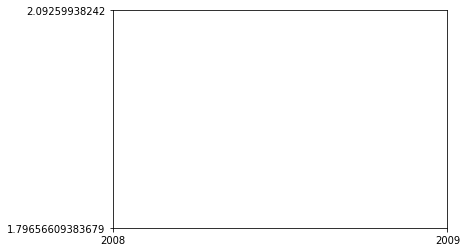

In [220]:
plt.plot(years,'Vietnam',data = ASEAN_T)